In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")


In [48]:
#Reading the data file
df = pd.read_csv('kidney_disease.csv')

df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df = df.drop('id', axis=1)

df.shape, df.describe

((400, 25),
 <bound method NDFrame.describe of       age    bp     sg   al   su     rbc        pc         pcc          ba  \
 0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
 1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
 2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
 3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
 4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
 ..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
 395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
 396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
 397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
 398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
 399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
 
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [49]:
missing_values = df.isnull().sum()

missing_values

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

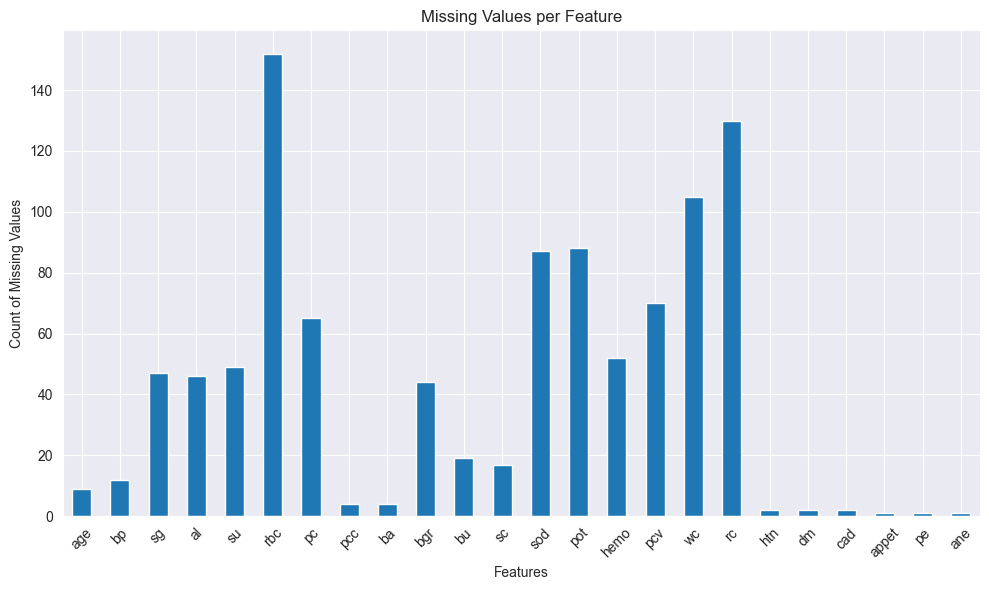

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming your DataFrame is named 'df'
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0] # Filter features with␣

# Create a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
# Show the plot
plt.tight_layout()
plt.show()


In [51]:
# Filling missing values for numerical features
# Numerical columns for median imputation
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod','pot', 'hemo']
# Impute missing values with the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
# Check if there are any remaining missing values
remaining_missing_values = df.isnull().sum()
# Display the columns with missing values and their counts (after imputation)
remaining_missing_values[remaining_missing_values > 0]


rbc      152
pc        65
pcc        4
ba         4
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [52]:
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet','pe', 'ane','pcv','wc','rc']
# Impute missing values with the mode
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
# Check if there are any remaining missing values
remaining_missing_values_categorical = df[categorical_columns].isnull().sum()
# Display the columns with missing values and their counts (after imputation)
remaining_missing_values_categorical[remaining_missing_values_categorical > 0]

Series([], dtype: int64)

In [53]:
 # Check for missing values in each column
missing_values = df.isnull().sum()
# Display the count of missing values for each column
print(missing_values)


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


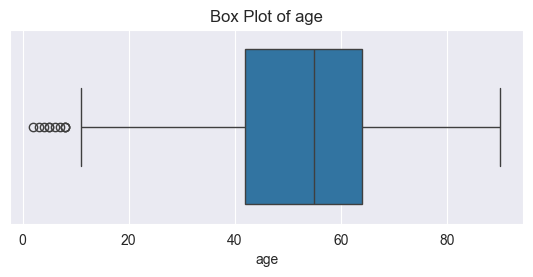

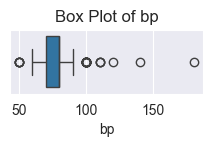

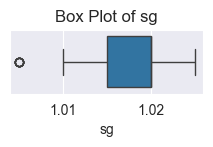

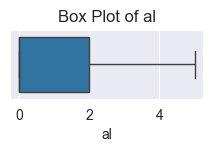

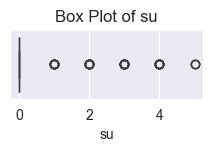

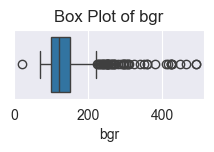

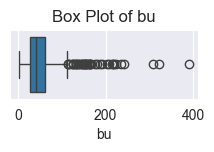

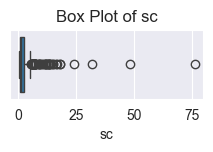

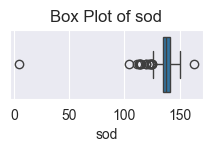

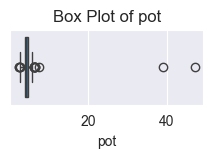

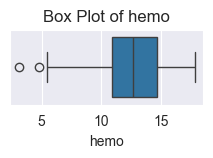

Outliers in age:
      id  age    bp     sg   al   su       rbc        pc         pcc  \
1      1  7.0  50.0  1.020  4.0  0.0    normal    normal  notpresent   
75    75  5.0  80.0  1.015  1.0  0.0    normal    normal  notpresent   
131  131  5.0  50.0  1.010  0.0  0.0    normal    normal  notpresent   
150  150  8.0  60.0  1.025  3.0  0.0    normal    normal  notpresent   
185  185  4.0  80.0  1.020  1.0  0.0    normal    normal  notpresent   
186  186  8.0  50.0  1.020  4.0  0.0    normal    normal  notpresent   
187  187  3.0  80.0  1.010  2.0  0.0    normal    normal  notpresent   
188  188  8.0  80.0  1.020  0.0  0.0    normal    normal  notpresent   
190  190  6.0  60.0  1.010  4.0  0.0  abnormal  abnormal  notpresent   
215  215  2.0  80.0  1.010  3.0  0.0    normal  abnormal  notpresent   

             ba  ...  pcv     wc   rc  htn    dm  cad appet   pe  ane  \
1    notpresent  ...   38   6000  5.2   no    no   no  good   no   no   
75   notpresent  ...   41   9800  5.2   no  

In [54]:
# Specify numerical columns for outlier detection
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod','pot', 'hemo']
# Create subplots for outlier visualization
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()
# Define a function to identify outliers using IQR method
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# Detect and display outliers for each numerical column
for column in numerical_columns:
    outliers = identify_outliers_iqr(df, column)
    if not outliers.empty:
        print(f'Outliers in {column}:')
        print(outliers)


In [55]:
# Define a function to handle outliers using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), data[column].median(), data[column])
# Specify numerical columns for outlier handling
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod','pot', 'hemo']
# Handle outliers for each numerical column
for column in numerical_columns:
    handle_outliers_iqr(df, column)

In [56]:
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [57]:
df_encoded.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,138.0,...,True,False,False,False,True,True,False,False,False,False
1,1,55.0,80.0,1.02,4.0,0.0,121.0,18.0,0.8,138.0,...,False,False,False,True,False,True,False,False,False,False
2,2,62.0,80.0,1.01,2.0,0.0,121.0,53.0,1.8,138.0,...,False,False,False,False,True,True,False,True,False,True
3,3,48.0,70.0,1.02,4.0,0.0,117.0,56.0,3.8,138.0,...,True,False,False,True,False,True,False,True,True,True
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,138.0,...,False,False,False,True,False,True,False,False,False,False


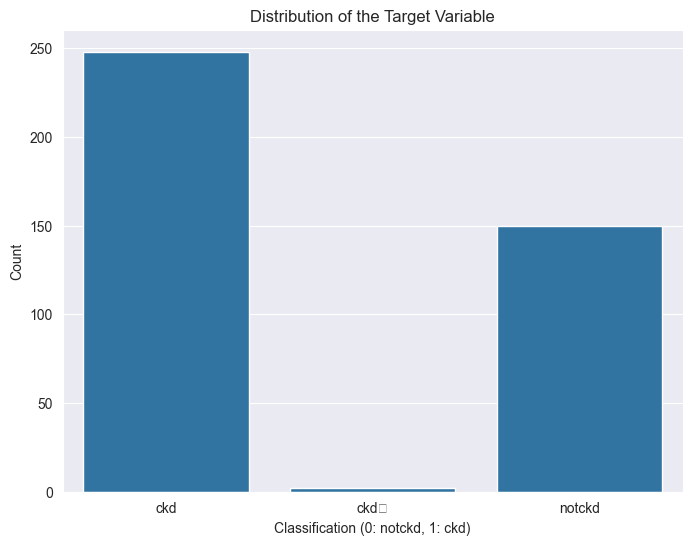

In [58]:

plt.figure(figsize=(8, 6))
sns.countplot(x='classification', data=df_encoded)
plt.title('Distribution of the Target Variable')
plt.xlabel('Classification (0: notckd, 1: ckd)')
plt.ylabel('Count')
plt.show()



In [31]:
!pip install  imbalanced-learn


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 640.0 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 195.7 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 217.9 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 217.9 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 241.3 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 227.6 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 251.6 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 240.2 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 258.0 kB/s eta 0:00:01
   ------------------------ ------------- 163.8/2

In [59]:
# Define a mapping dictionary
mapping = {'notckd': 0, 'ckd': 1}
# Map the values in the 'classification' column of df_encoded using the defined mapping
df_encoded['classification'] = df_encoded['classification'].map(mapping)
# Display the first few rows of the updated dataframe
df_encoded.head()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,htn_yes,dm_\tyes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,138.0,...,True,False,False,False,True,True,False,False,False,False
1,1,55.0,80.0,1.02,4.0,0.0,121.0,18.0,0.8,138.0,...,False,False,False,True,False,True,False,False,False,False
2,2,62.0,80.0,1.01,2.0,0.0,121.0,53.0,1.8,138.0,...,False,False,False,False,True,True,False,True,False,True
3,3,48.0,70.0,1.02,4.0,0.0,117.0,56.0,3.8,138.0,...,True,False,False,True,False,True,False,True,True,True
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,138.0,...,False,False,False,True,False,True,False,False,False,False


In [64]:
import numpy as np

# Replace non-numeric values with NaN
df_encoded.replace(r'\t?', 1, regex=True, inplace=True)

# Optionally, fill NaN values or drop rows/columns with NaN
# Example: Fill NaN values with column mean
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Ensure all data is numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')


In [60]:
df_encoded['classification'].value_counts()

classification
1.0    248
0.0    150
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Separate features (X) and target variable (y)
X = df_encoded.drop('classification', axis=1)

y = df_encoded['classification']

y.fillna(y.mode()[0], inplace=True)

# Ensure the target variable is updated in the original DataFrame
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check the class distribution after resampling
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())




Class distribution after SMOTE:
classification
1.0    198
0.0    198
Name: count, dtype: int64


In [66]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train_resampled)
# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)
# Convert the normalized arrays back to DataFrames (optional)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model to the normalized training data
rf_model.fit(X_train_normalized, y_train_resampled)
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
[[28  0]
 [ 0 52]]


In [68]:
from sklearn.svm import SVC
# Instantiate the Support Vector Machine model
svm_model = SVC(random_state=42)
# Fit the model to the normalized training data
svm_model.fit(X_train_normalized, y_train_resampled)
# Predictions on the test set
y_pred_svm = svm_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9875

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:
[[28  0]
 [ 1 51]]


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model to the normalized training data
rf_model.fit(X_train_normalized, y_train_resampled)
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
[[28  0]
 [ 0 52]]


In [69]:
from sklearn.neural_network import MLPClassifier
# Instantiate the Artificial Neural Network model
ann_model = MLPClassifier(random_state=42)
# Fit the model to the normalized training data
ann_model.fit(X_train_normalized, y_train_resampled)
# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_normalized)
# Evaluate the performance
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))


ANN Accuracy: 0.975

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        28
         1.0       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80


Confusion Matrix:
[[28  0]
 [ 2 50]]


Custom ANN Accuracy: 0.9875

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:
[[28  0]
 [ 1 51]]


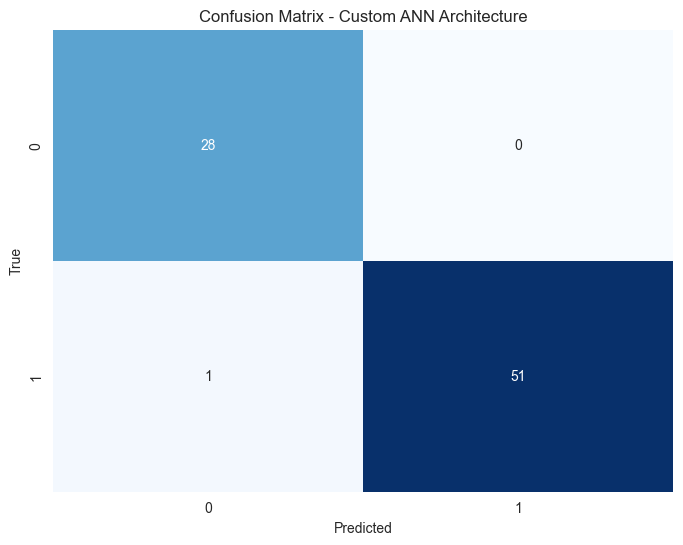

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Instantiate the ANN model with a different architecture
ann_model_custom = MLPClassifier(hidden_layer_sizes=(128, 64),activation='relu', solver='adam', random_state=42)
# Fit the model on the normalized and resampled training data
ann_model_custom.fit(X_train_normalized, y_train_resampled)
# Predict on the normalized test data
y_pred_ann_custom = ann_model_custom.predict(X_test_normalized)
# Evaluate the performance of the ANN with the new architecture
accuracy_ann_custom = accuracy_score(y_test, y_pred_ann_custom)
print("Custom ANN Accuracy:", accuracy_ann_custom)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann_custom))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_custom))
# Plot the confusion matrix for the custom architecture
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ann_custom), annot=True, fmt="d",cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Custom ANN Architecture")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Confusion Matrix:
[[28  0]
 [ 0 52]]


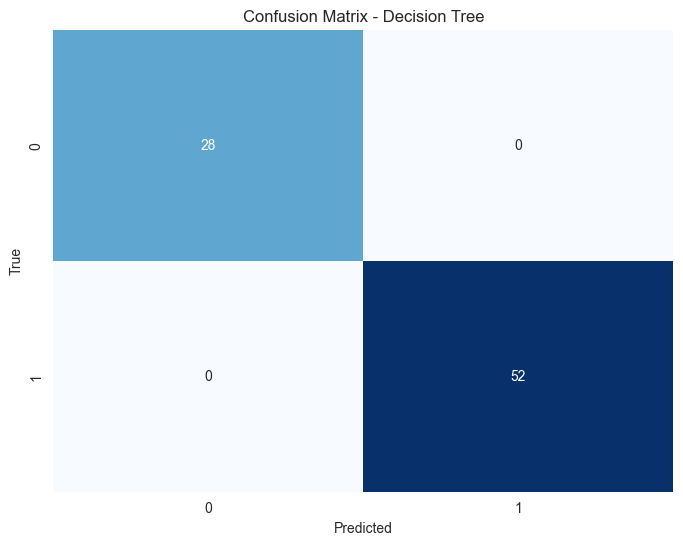

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
# Fit the model on the normalized and resampled training data
decision_tree_model.fit(X_train_normalized, y_train_resampled)
# Predict on the normalized test data
y_pred_decision_tree = decision_tree_model.predict(X_test_normalized)
# Evaluate the performance of the Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decision_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_decision_tree))
# Plot the confusion matrix for the Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True,fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


K-NN Accuracy: 0.9875

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        28
         1.0       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80


Confusion Matrix:
[[28  0]
 [ 1 51]]


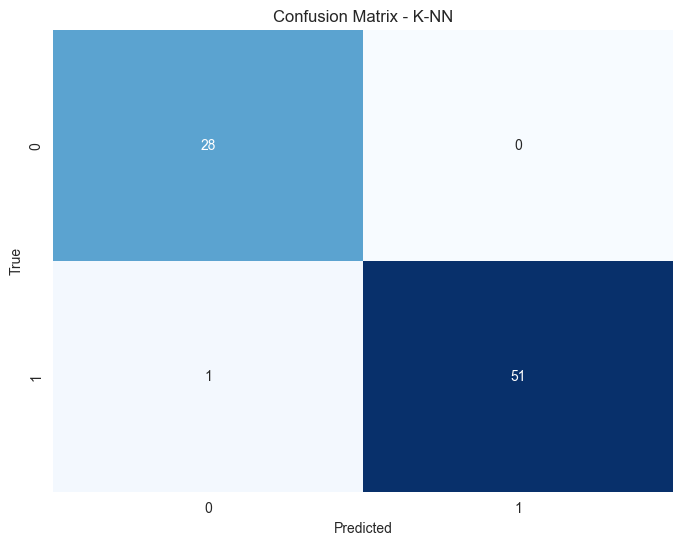

In [76]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
# Fit the model on the normalized and resampled training data
knn_model.fit(X_train_normalized, y_train_resampled)
# Predict on the normalized test data
y_pred_knn = knn_model.predict(X_test_normalized)
# Evaluate the performance of K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-NN Accuracy:", accuracy_knn)
print("\nClassification Report:")

print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
# Plot the confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d",cmap="Blues", cbar=False)
plt.title("Confusion Matrix - K-NN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


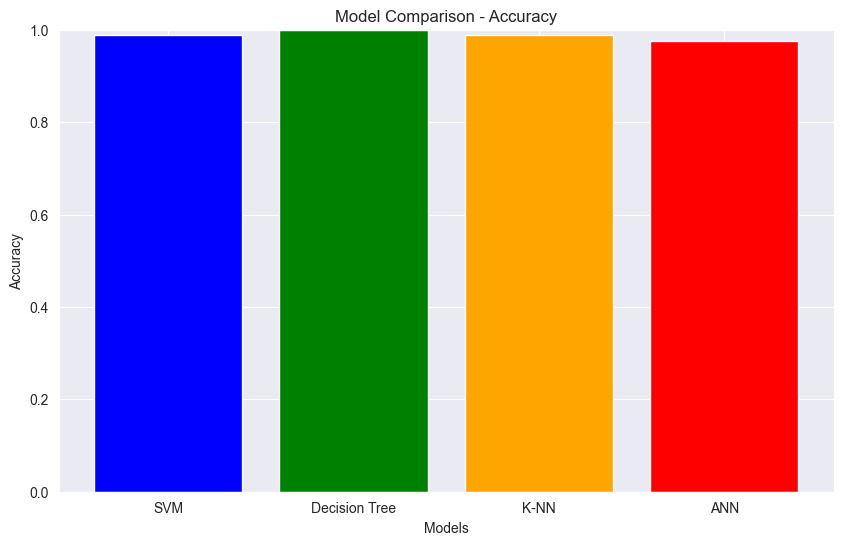

In [77]:
models = ['SVM', 'Decision Tree', 'K-NN', 'ANN']
# List of accuracy scores for each model
accuracies = [accuracy_svm, accuracy_decision_tree, accuracy_knn, accuracy_ann]
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit to the range of accuracy scores (0 to 1)
plt.show()


In [79]:
import pickle
file_name = 'model.pkl'

pickle.dump(rf_model, open(file_name, 'wb'))